# Ford GoBike System Data Exploration 
## by Caleb Manske

## Preliminary Wrangling

>  Looking at Bay Wheels's trip data for public use in the years of 2018 to 2019. Find dataset here:
https://www.lyft.com/bikes/bay-wheels/system-data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import requests
import os
from io import BytesIO
from zipfile import ZipFile
#import glob
#!pip install pandas plotnine
#from plotnine import *

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Make directory if it doesn't already exist
folder_name = 'ford-gobike-data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
data_files = [
    'https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip', 
    'https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201812-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip']

In [4]:
for url in data_files:
    response = requests.get(url)
    zip_file_ = ZipFile(BytesIO(response.content))
    zip_file_.extractall('ford-gobike-data')

In [5]:
#Congregating together all the datasets to be stitched into a dataframe in the next cell

path = r'ford-gobike-data'
raw_dfs = []

for file in os.listdir(path):
    if file == '__MACOSX':
        pass
    else:
        raw_dfs.append(pd.read_csv(path + '/' + file, engine='python'))

In [6]:
#Stitching the datasets together into a dataframe
df = pd.concat(raw_dfs, sort=False)

In [7]:
df.to_csv('raw_combine.csv')

In [8]:
df = pd.read_csv('raw_combine.csv')

/Users/owner/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
#check and test
df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No,NaN
1,1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No,NaN
2,2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No,NaN
3,3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No,NaN
4,4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370704 entries, 0 to 4370703
Data columns (total 16 columns):
Unnamed: 0                 int64
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
dtypes: float64(6), int64(3), object(7)
memory usage: 533.5+ MB


## Quick Clean

In [11]:
# Create copies of original 
df_clean = df.copy()

In [12]:
# set dates datatype to timestamps and seperate day and time
#df_clean.start_time = pd.to_datetime(df_clean.start_time)
#df_clean.end_time = pd.to_datetime(df_clean.end_time)

df_clean['start_date'] = pd.to_datetime(df_clean['start_time']).dt.date
df_clean['start_time'] = pd.to_datetime(df_clean['start_time']).dt.time

df_clean['end_date'] = pd.to_datetime(df_clean['end_time']).dt.date
df_clean['end_time'] = pd.to_datetime(df_clean['end_time']).dt.time


In [13]:
# set user type, gender and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [14]:
# set bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)

In [15]:
df_clean['duration_min']=df_clean['duration_sec']/60
df_clean['duration_hr']=df_clean['duration_min']/60
df_clean['duration_min']=df_clean['duration_min'].astype(float)
df_clean['duration_hr']=df_clean['duration_hr'].astype(float)
df_clean.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,start_date,end_date,duration_min,duration_hr
0,0,598,23:59:47.097000,00:09:45.187000,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No,NaN,2018-02-28,2018-03-01,9.966667,0.166111
1,1,943,23:21:16.495000,23:36:59.974000,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No,NaN,2018-02-28,2018-02-28,15.716667,0.261944
2,2,18587,18:20:55.190000,23:30:42.925000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No,NaN,2018-02-28,2018-02-28,309.783333,5.163056
3,3,18558,18:20:53.621000,23:30:12.450000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No,NaN,2018-02-28,2018-02-28,309.300000,5.155000
4,4,885,23:15:12.858000,23:29:58.608000,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes,NaN,2018-02-28,2018-02-28,14.750000,0.245833


In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370704 entries, 0 to 4370703
Data columns (total 20 columns):
Unnamed: 0                 int64
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
bike_share_for_all_trip    category
rental_access_method       object
start_date                 object
end_date                   object
duration_min               float64
duration_hr                float64
dtypes: category(2), float64(6), int64(2), object(10)
memory usage: 608.6+ MB


### What is the structure of your dataset?

> The dataset features duration time with starting time and ending time, features location and geography of ride, features type of specific bike used, and how the customer engages in the program.

### What is/are the main feature(s) of interest in your dataset?

> Lets see how long trip duration is
> Lets see what factors which influence the trip duration 
> Lets see what type of customer is more frequent

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip Duration, User Type, Start Date and End Date, user_type, bike_share_for_all_trip, rental_access_method

## Futher Cleaning

In [17]:
df_clean['start_station_id'].isna().sum()

0

In [18]:
df_clean.dropna(subset=['start_station_id'],inplace=True)

In [19]:
# Seperate columns of date further 
df_clean['start_date1'] =  pd.to_datetime(df_clean['start_date'], format='%Y-%m-%d')
df_clean['day'] = df_clean['start_date1'].apply(lambda r:r.day).astype(int)
df_clean['month'] = df_clean['start_date1'].apply(lambda r:r.month).astype(int)

df_clean.head(2)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,user_type,bike_share_for_all_trip,rental_access_method,start_date,end_date,duration_min,duration_hr,start_date1,day,month
0,0,598,23:59:47.097000,00:09:45.187000,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,...,Subscriber,No,NaN,2018-02-28,2018-03-01,9.966667,0.166111,2018-02-28,28,2
1,1,943,23:21:16.495000,23:36:59.974000,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),...,Customer,No,NaN,2018-02-28,2018-02-28,15.716667,0.261944,2018-02-28,28,2


In [20]:
# calculate the distance
df_clean['distance'] = np.sqrt((df_clean.start_station_longitude - df_clean.end_station_longitude) ** 2
                               + (df_clean.start_station_latitude - df_clean.end_station_latitude) ** 2)

In [21]:
# extract start time weekdays
# set dates to timestamps
df_2 = df.copy()
df_2.start_time = pd.to_datetime(df_2.start_time)
df_2.end_time = pd.to_datetime(df_2.end_time)

# extract start time weekdays
df_clean['start_time_weekday']=df_2['start_time'].dt.strftime('%a')


In [22]:
df_clean.to_csv('df_clean.csv')

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

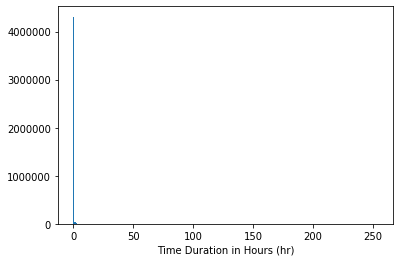

In [23]:
bins = np.arange(0, df_clean['duration_hr'].max()+1, 1)
plt.hist(data = df_clean, x = 'duration_hr', bins = bins)
plt.xlabel('Time Duration in Hours (hr)')
plt.show()

In [24]:
df_clean.duration_hr.describe()

count    4.370704e+06
mean     2.302282e-01
std      5.979121e-01
min      1.666667e-02
25%      9.861111e-02
50%      1.566667e-01
75%      2.447222e-01
max      2.533639e+02
Name: duration_hr, dtype: float64

> As we can see, this graph is not very readable, and the mean, max, and min show that there are outliers.  These outliers are making the graph have poor quality

### Find these outliers and see what they look like with and without.

In [25]:
# lets see what the outliers look like
clean_outliers = (df_clean['duration_hr'] >3)
df_clean.loc[clean_outliers].head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,rental_access_method,start_date,end_date,duration_min,duration_hr,start_date1,day,month,distance,start_time_weekday
2,2,18587,18:20:55.190000,23:30:42.925000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,...,NaN,2018-02-28,2018-02-28,309.783333,5.163056,2018-02-28,28,2,0.025165,Wed
3,3,18558,18:20:53.621000,23:30:12.450000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,...,NaN,2018-02-28,2018-02-28,309.300000,5.155000,2018-02-28,28,2,0.025165,Wed
310,310,12493,16:29:20.590000,19:57:33.963000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5.0,Powell St BART Station (Market St at 5th St),...,NaN,2018-02-28,2018-02-28,208.216667,3.470278,2018-02-28,28,2,0.009543,Wed
898,898,36573,07:59:34.204000,18:09:08.016000,99.0,Folsom St at 15th St,37.767037,-122.415442,47.0,4th St at Harrison St,...,NaN,2018-02-28,2018-02-28,609.550000,10.159167,2018-02-28,28,2,0.020976,Wed
1566,1566,19496,11:23:53.204000,16:48:49.654000,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3.0,Powell St BART Station (Market St at 4th St),...,NaN,2018-02-28,2018-02-28,324.933333,5.415556,2018-02-28,28,2,0.013994,Wed


In [26]:
# lets see what the non outliers look like
df_clean.loc[~clean_outliers].head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,rental_access_method,start_date,end_date,duration_min,duration_hr,start_date1,day,month,distance,start_time_weekday
0,0,598,23:59:47.097000,00:09:45.187000,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,...,NaN,2018-02-28,2018-03-01,9.966667,0.166111,2018-02-28,28,2,0.020464,Wed
1,1,943,23:21:16.495000,23:36:59.974000,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),...,NaN,2018-02-28,2018-02-28,15.716667,0.261944,2018-02-28,28,2,0.017301,Wed
4,4,885,23:15:12.858000,23:29:58.608000,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,...,NaN,2018-02-28,2018-02-28,14.750000,0.245833,2018-02-28,28,2,0.015132,Wed
5,5,921,23:14:19.170000,23:29:40.437000,312.0,San Jose Diridon Station,37.329732,-121.901782,288.0,Mission St at 1st St,...,NaN,2018-02-28,2018-02-28,15.350000,0.255833,2018-02-28,28,2,0.021234,Wed
6,6,277,23:21:49.274000,23:26:27.222000,316.0,San Salvador St at 1st St,37.330165,-121.885831,310.0,San Fernando St at 4th St,...,NaN,2018-02-28,2018-02-28,4.616667,0.076944,2018-02-28,28,2,0.005723,Wed


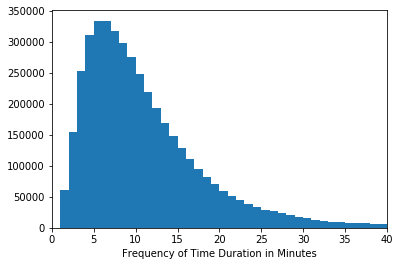

In [27]:
bins = np.arange(0, df_clean['duration_min'].max()+1, 1)
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xlim([0,40])

plt.xlabel('Frequency of Time Duration in Minutes')
plt.show()

> Most of the frequncy of time used is around 8 minutes and the max is around 40 minutes.

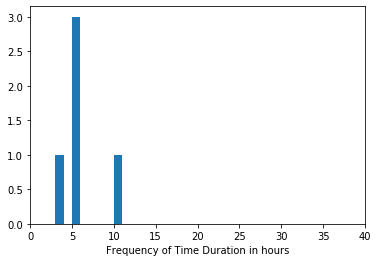

In [28]:
outliers = df_clean.loc[clean_outliers].head()

bins = np.arange(0, outliers['duration_hr'].max()+1, 1)
plt.hist(data = outliers, x = 'duration_hr', bins = bins)
plt.xlim([0,40])

plt.xlabel('Frequency of Time Duration in hours')
plt.show()

> The outliers past 3 hours show that the bike is frequency being used at most around 5 hours use and max use is typically above 10 hours use.

#### Now find the total amount of each month, day of month, and day of week where the bike is used by graphing.

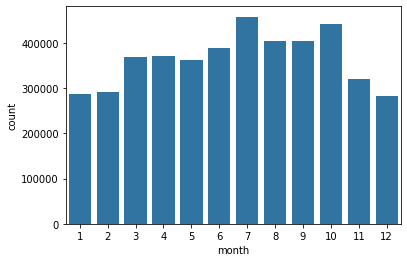

In [29]:
sb.countplot(data=df_clean,x='month', color=sb.color_palette()[0])

> This graph easily shows tht the month of July (7) is the most popular while between January (1) and December (12) it is nearly equally the least used.  Makes sense as snow, ice and cold weather can affect if the bike is used.

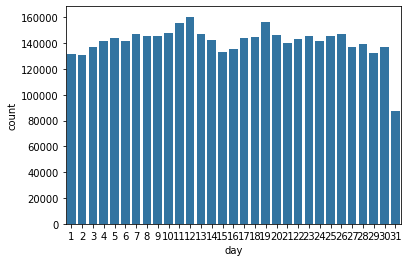

In [30]:
sb.countplot(data=df_clean, x='day', color=sb.color_palette()[0])

> This graph easily shows that the day of the 11th, and 12th of a month are most popular.  Last day of the month, is least popular.  Howerver, since days and weekdays do not always correlate, this does not tell much.  But the last day of the month being neglected is interesting.

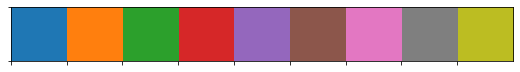

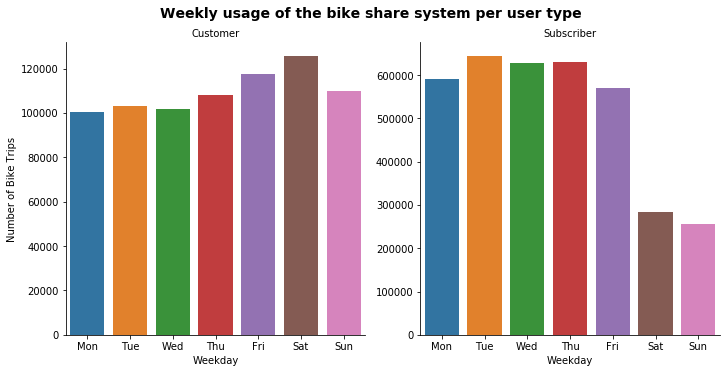

In [32]:
colorbar = sb.palplot(sb.color_palette(n_colors=9))
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False,
            color = colorbar, order = weekday)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

> This graph easily shows that the Tuesday is the most frequent day while Sunday is not.

#### Find what the category/string like data types look like for this bike share program.

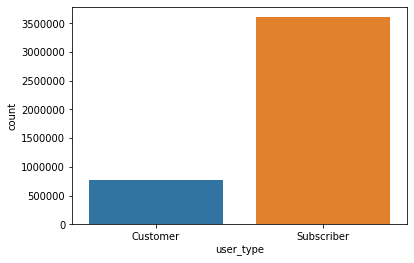

In [33]:
sb.countplot(data=df_clean,x='user_type')

> There are significantly more subscribers and must show, subscribers are more likely to use the bike system.

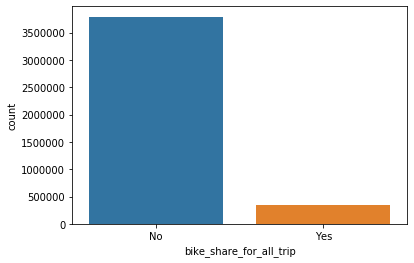

In [34]:
sb.countplot(data=df_clean,x='bike_share_for_all_trip')

> Interestingly, the bike share was not used for all of the commuter’s trip. This most show or imply that this program is mostly used in cities.

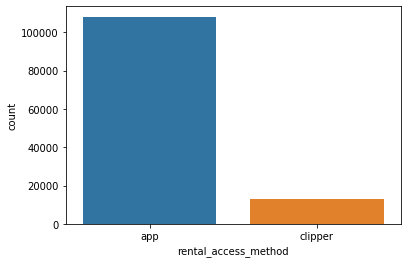

In [35]:
sb.countplot(data=df_clean,x='rental_access_method')

> Having an app is more widely utilized and must play a big factor whether the bike is used.

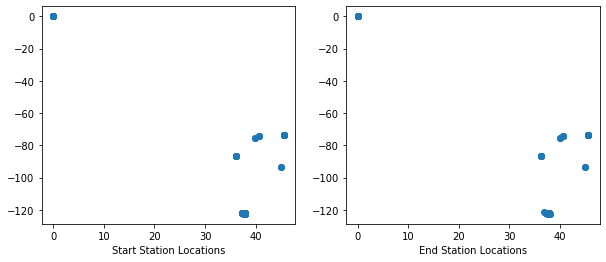

In [36]:
# plot the distribution of location
plt.figure(figsize=[10, 4])

plt.subplot(1, 2, 1)
plt.scatter(data=df_clean, x='start_station_latitude', y='start_station_longitude')
plt.xlabel('Start Station Locations')

plt.subplot(1, 2, 2)
plt.scatter(data=df_clean, x='end_station_latitude', y='end_station_longitude')
plt.xlabel('End Station Locations');

> End location and start location are nearly in the same location.  These distances are not very far.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I made a small tranformation to see what the with and without outliers of time look like.  I had a hard time reading the first plot for hours. The user is most likely to be using an app on a cell phone, being s subscriber, and not using a bike for the whole commute.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Earlier, I changed the original datetime as it was too much in one column and split it up into seperate components.  I also created a distance length measure as it was lacking.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

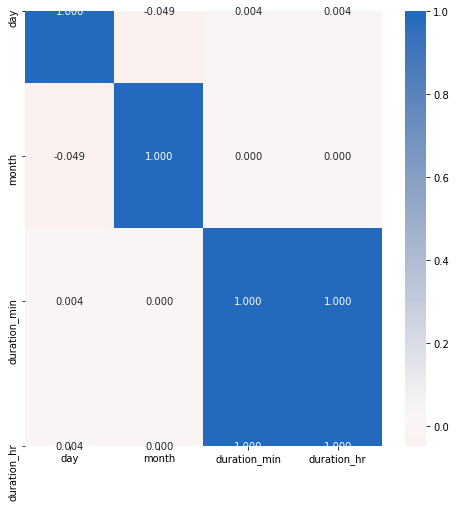

In [37]:
numeric_vars = ['day','month','duration_min', 'duration_hr', 'user_type']
plt.figure(figsize = [8, 8])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

#### There is a negative correlation between day and month, a small postive correlation between duration_min/duration_hr and day, and a large correlation between duration_min and duration_hr.  This information really does not tell much.

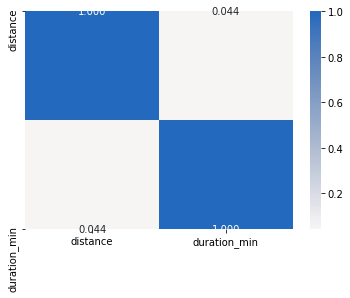

In [38]:
sb.heatmap(df_clean[['distance', 'duration_min']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

#### The correlation between these two variables is low

#### Graph a bivariate exploration of the user_type customer and user_type subscriber to find any relationships.

/Users/owner/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


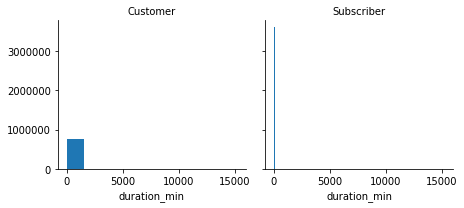

In [39]:
# plotting
g = sb.FacetGrid(data = df_clean, col = 'user_type', col_wrap = 6, size = 3)
# try sb.distplot instead of plt.hist to see the plot in terms of density!
g.map(plt.hist, 'duration_min')
g.set_titles('{col_name}')

#### This graph is poorly done and shown.  Lets find another way to look at the relationship.

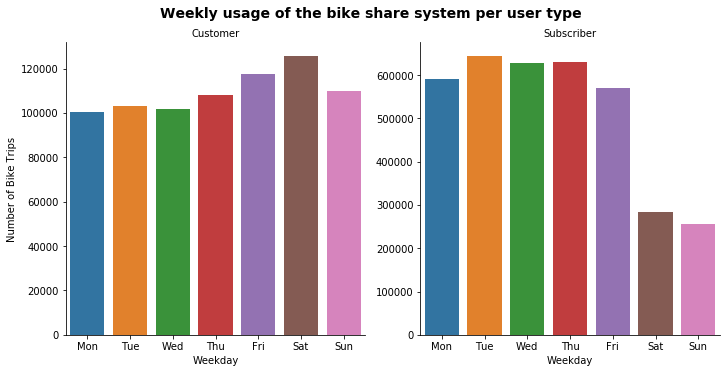

In [40]:
# weekday usege per user type
#colorbar = sb.palplot(sb.color_palette(n_colors=9))
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False,
            color = colorbar, order = weekday)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

> Among the subscribers, we find that Sunday is not utlized the most but is among the customers.  Among the customers, we find that Tuesday is not utlizied as much as Tuesday's for subscribers.  This clearly shows, subscribers and customers have a very different life and workstyle.

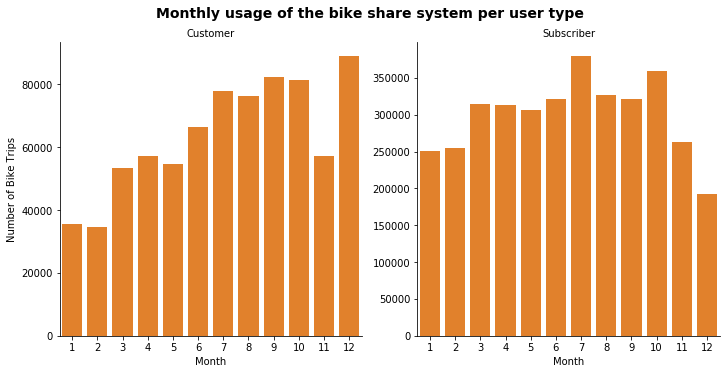

In [41]:
# monthly usege per user type

g = sb.catplot(data=df_clean, x='month', col="user_type", kind='count', sharey = False,
            color = sb.color_palette()[1])
g.set_axis_labels("Month", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

> Among the customers, we find that the 12th month is utilized the most but is not that way among subscribers. Among the customers, we find that the 1st and 2nd months, presumably, are not utilized that much compared to subscribers. There is a very large discrepancy in number of bike trips from the 1st month to the 12th month for customers. This relationship is almost linearly while it is not among subscribers. This clearly shows again that subscribers and customers have a very different life and workstyle.

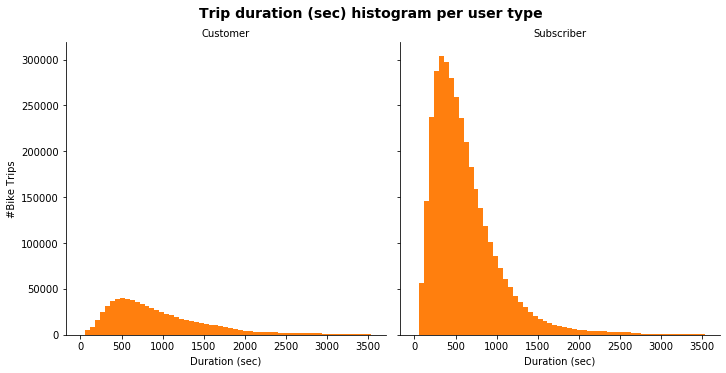

In [42]:
# code for the (histogram) duration (sec) distribution per user type

g = sb.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=sb.color_palette()[1], bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');

> Interestingly these distributions are both rightly skewed.  However, the subscribers have more of a peak.  We know that there are much more subscribers, so this peak makes sense.

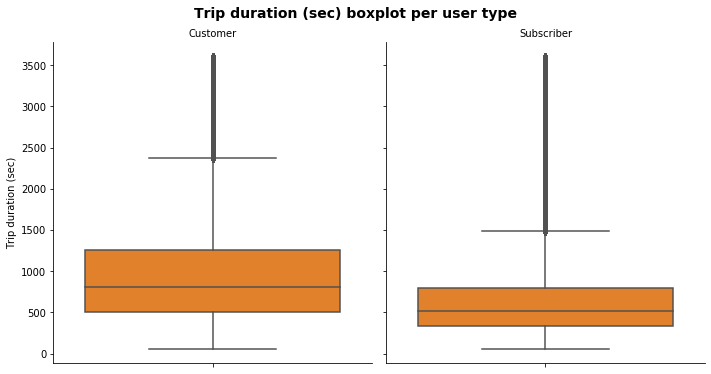

In [43]:
# code for the (boxplot) duration (sec) distribution per user type

data = df_clean.query('duration_sec < 3600')
g = sb.catplot(data=data, y='duration_sec', col="user_type", kind='box',
            color = sb.color_palette()[1])
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (sec)")
g.fig.suptitle('Trip duration (sec) boxplot per user type', y=1.03, fontsize=14, fontweight='semibold');

> From this box plot, we see that customers have a wider range of trip duration use for short trips.  We can almost imply that customers are more likely to be using this service for leasure and fun based on prior data.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In sum: We find each month and day is radically different for customers and subscribers.  Customers are more likely to use at a December than January , and is almost a linear relationship as month increases, presumably because it also gets warmer.  We find that weekends are not utlized that much for subscribers. We can almost imply that customers are more likely to be using this service for leisure and fun based on these many graphs and data combined.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, subscribers and customers have a very different life and workstyle.  Subscibers are more likely to use for workday realted purposes while customers more likely to use for fun.  The time of day will correlate with a specific month based on the heat map graphs.  Also as noted earlier, the user was most likely not to use the bike for the entire commute.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### How to the day, month and time fit on a linear timeframe.  Lets graph this.

/Users/owner/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


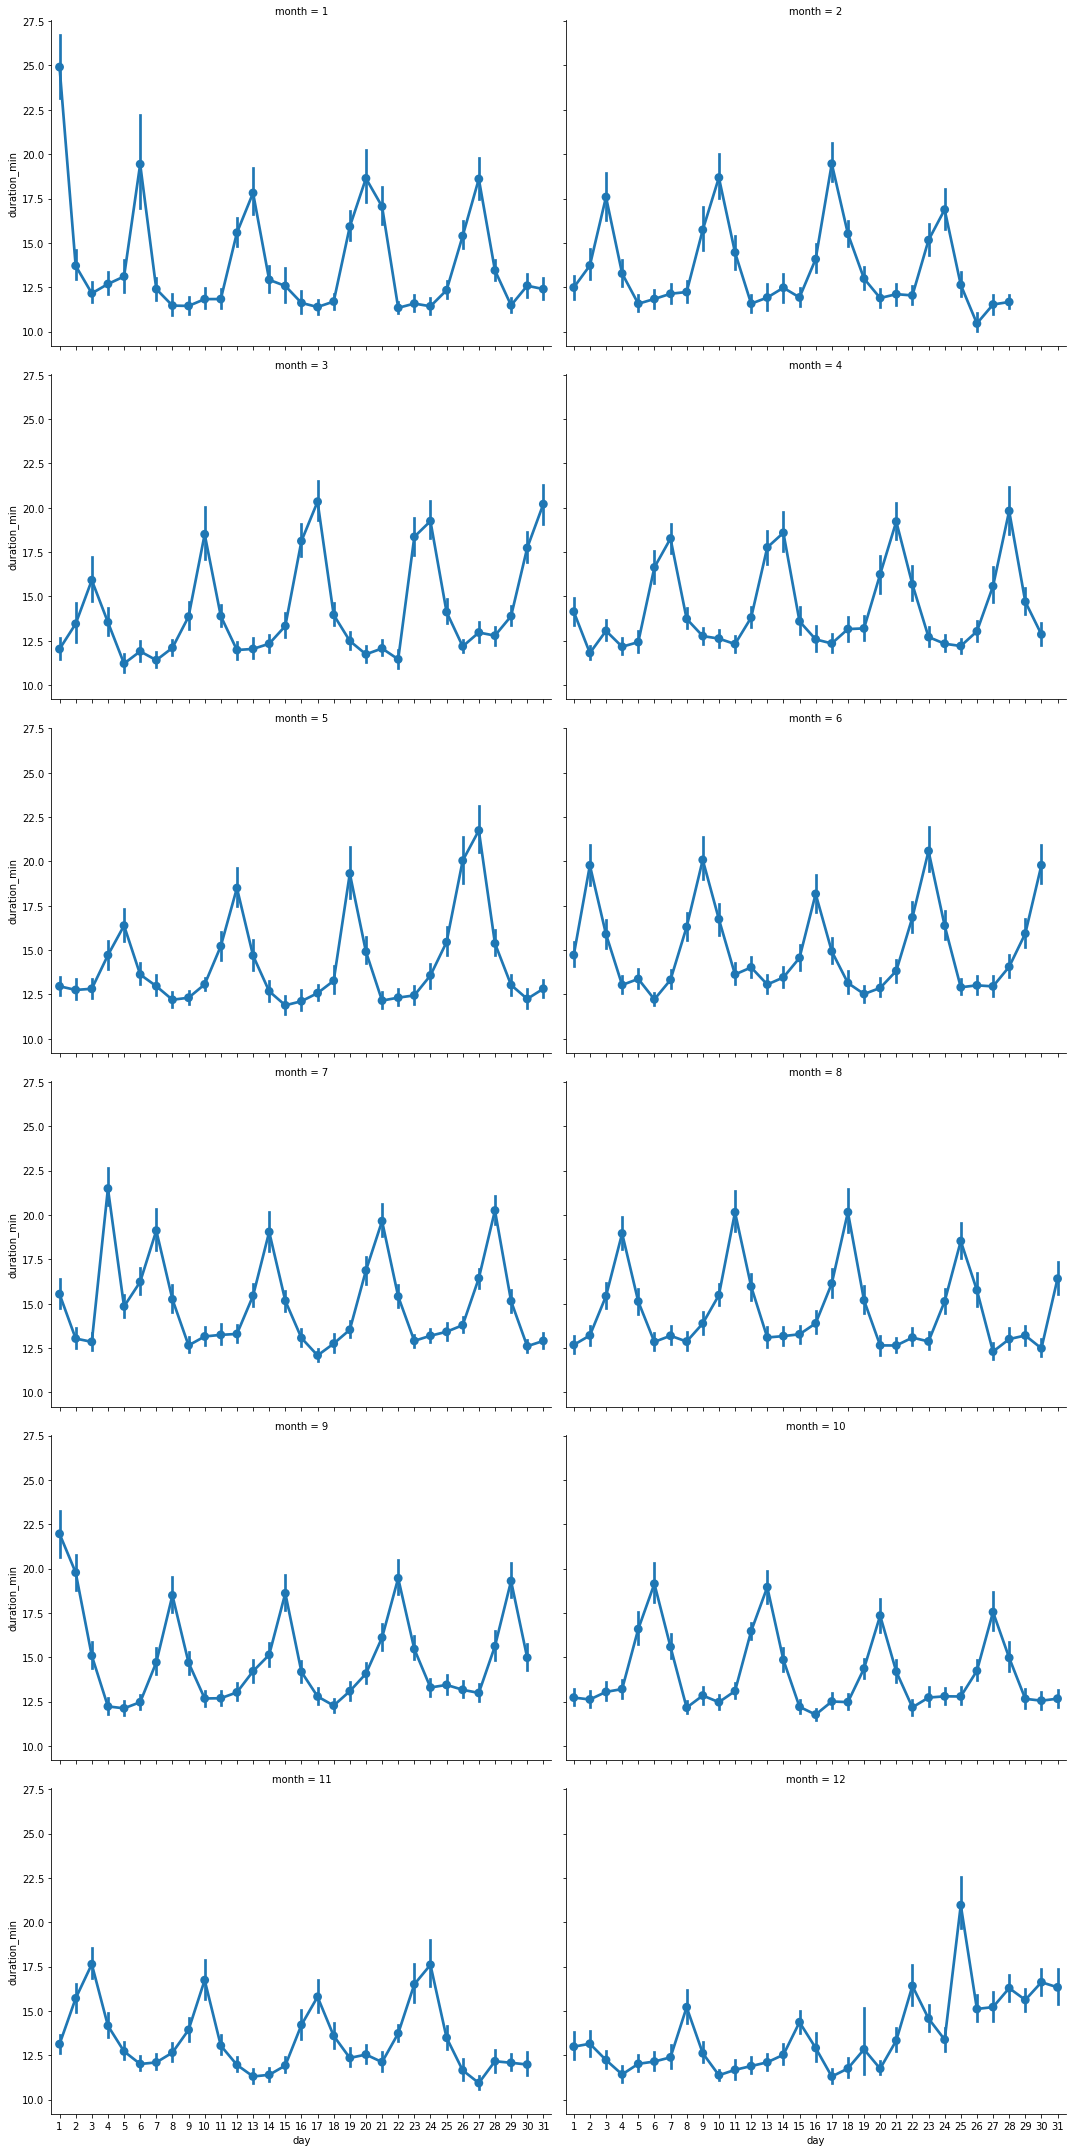

In [44]:
bin_edges = np.arange(0,31,1)
g=sb.FacetGrid(data=df_clean, col='month', col_wrap=2, size=5,aspect = 1.5)
g.map(sb.pointplot,'day', 'duration_min')

> The pattern is very similar amoung subcribers and customers with rising and lowering in cycles. I think the peaks might be the difference between weekend use and weekday use that was evident earlier in a prior graph. Interestingly this graph points out big spikes in a month.

#### Lets explore this same graphed relationship but with segmenting by user type.  Create a function to make code easier.

In [45]:
df_customer = df_clean.query('user_type == "Customer"')

In [46]:
df_subscriber = df_clean.query('user_type == "Subscriber"')

In [47]:
def line_graph(data_):
    bin_edges = np.arange(0,31,1)
    g=sb.FacetGrid(data=data_, col='month', col_wrap=2, size=5,aspect = 1.5)
    g.map(sb.pointplot,'day', 'duration_min')

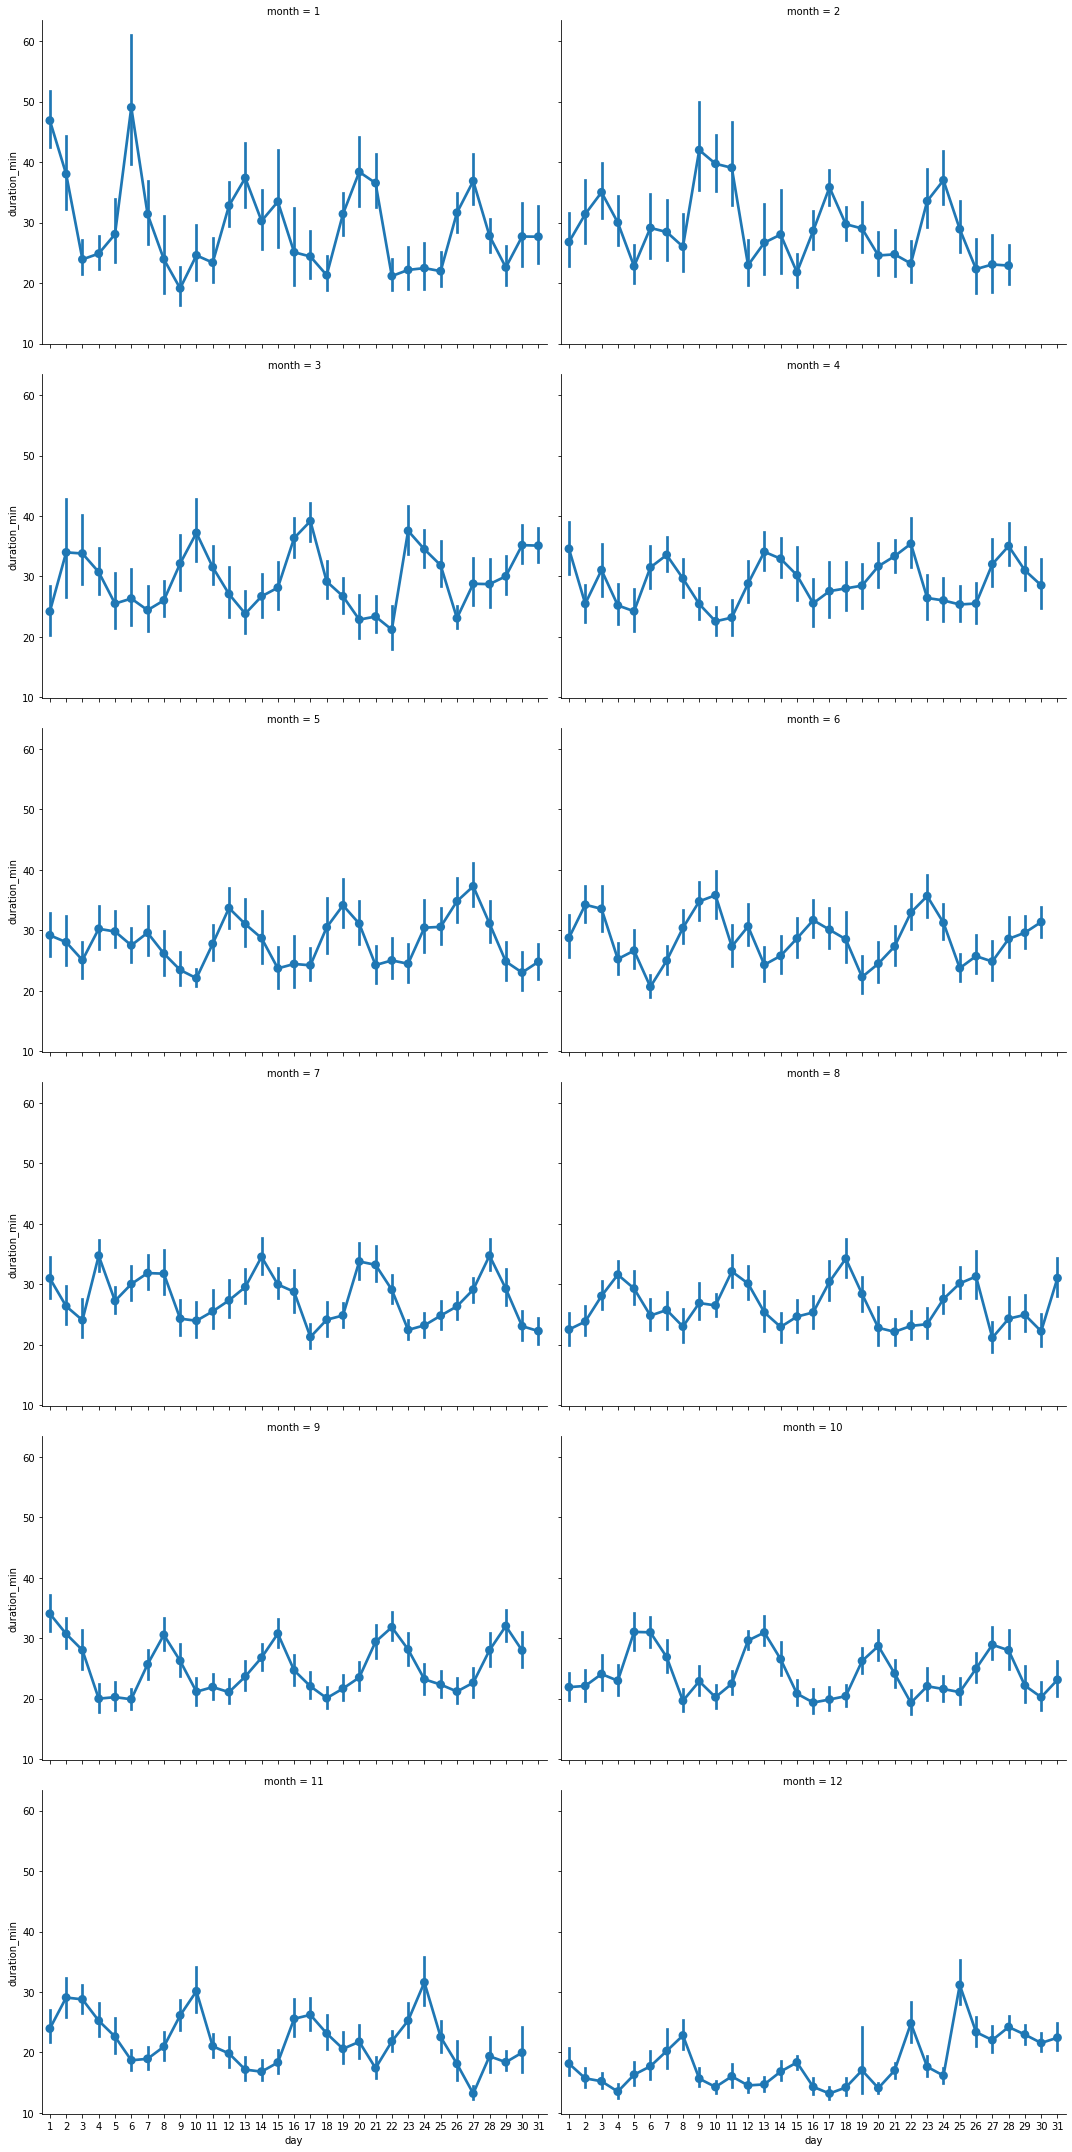

In [48]:

bin_edges = np.arange(0,31,1)
g=sb.FacetGrid(data=df_customer, col='month', col_wrap=2, size=5,aspect = 1.5)
g.map(sb.pointplot,'day', 'duration_min')

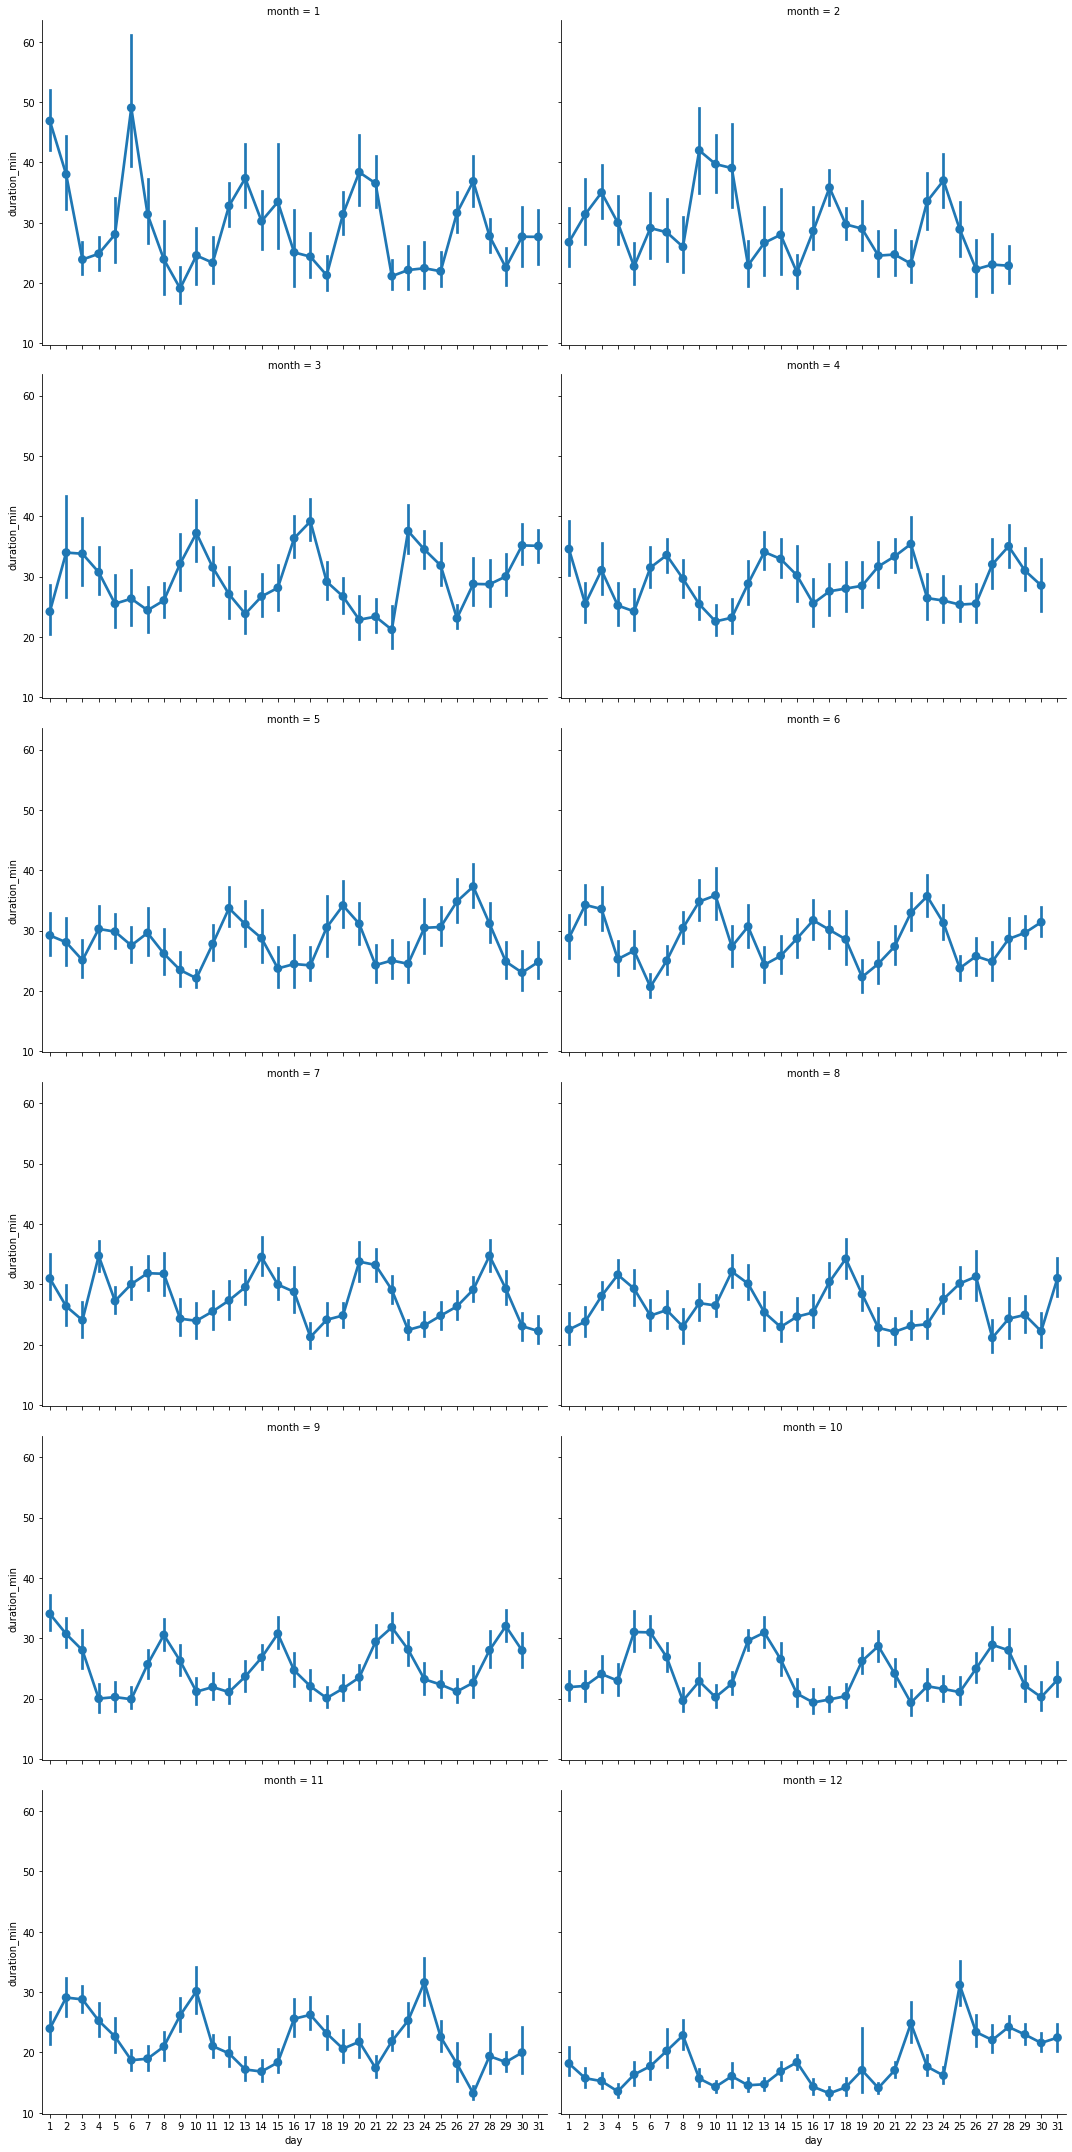

In [49]:
line_graph(df_customer)

> With subscribers excluded in this one and only customers analyzed, we see that month's 9 and 10 have less point like peaks compared to the whole dataset combine. However, this does not mean that these peaks are less in duration minutes used but are actually quite the contrary. They reach around a height of 35 minutes compared to the earlier graph which was between 19-20 of a peak. This is also the same case for month 2, 3, 5 and 6.

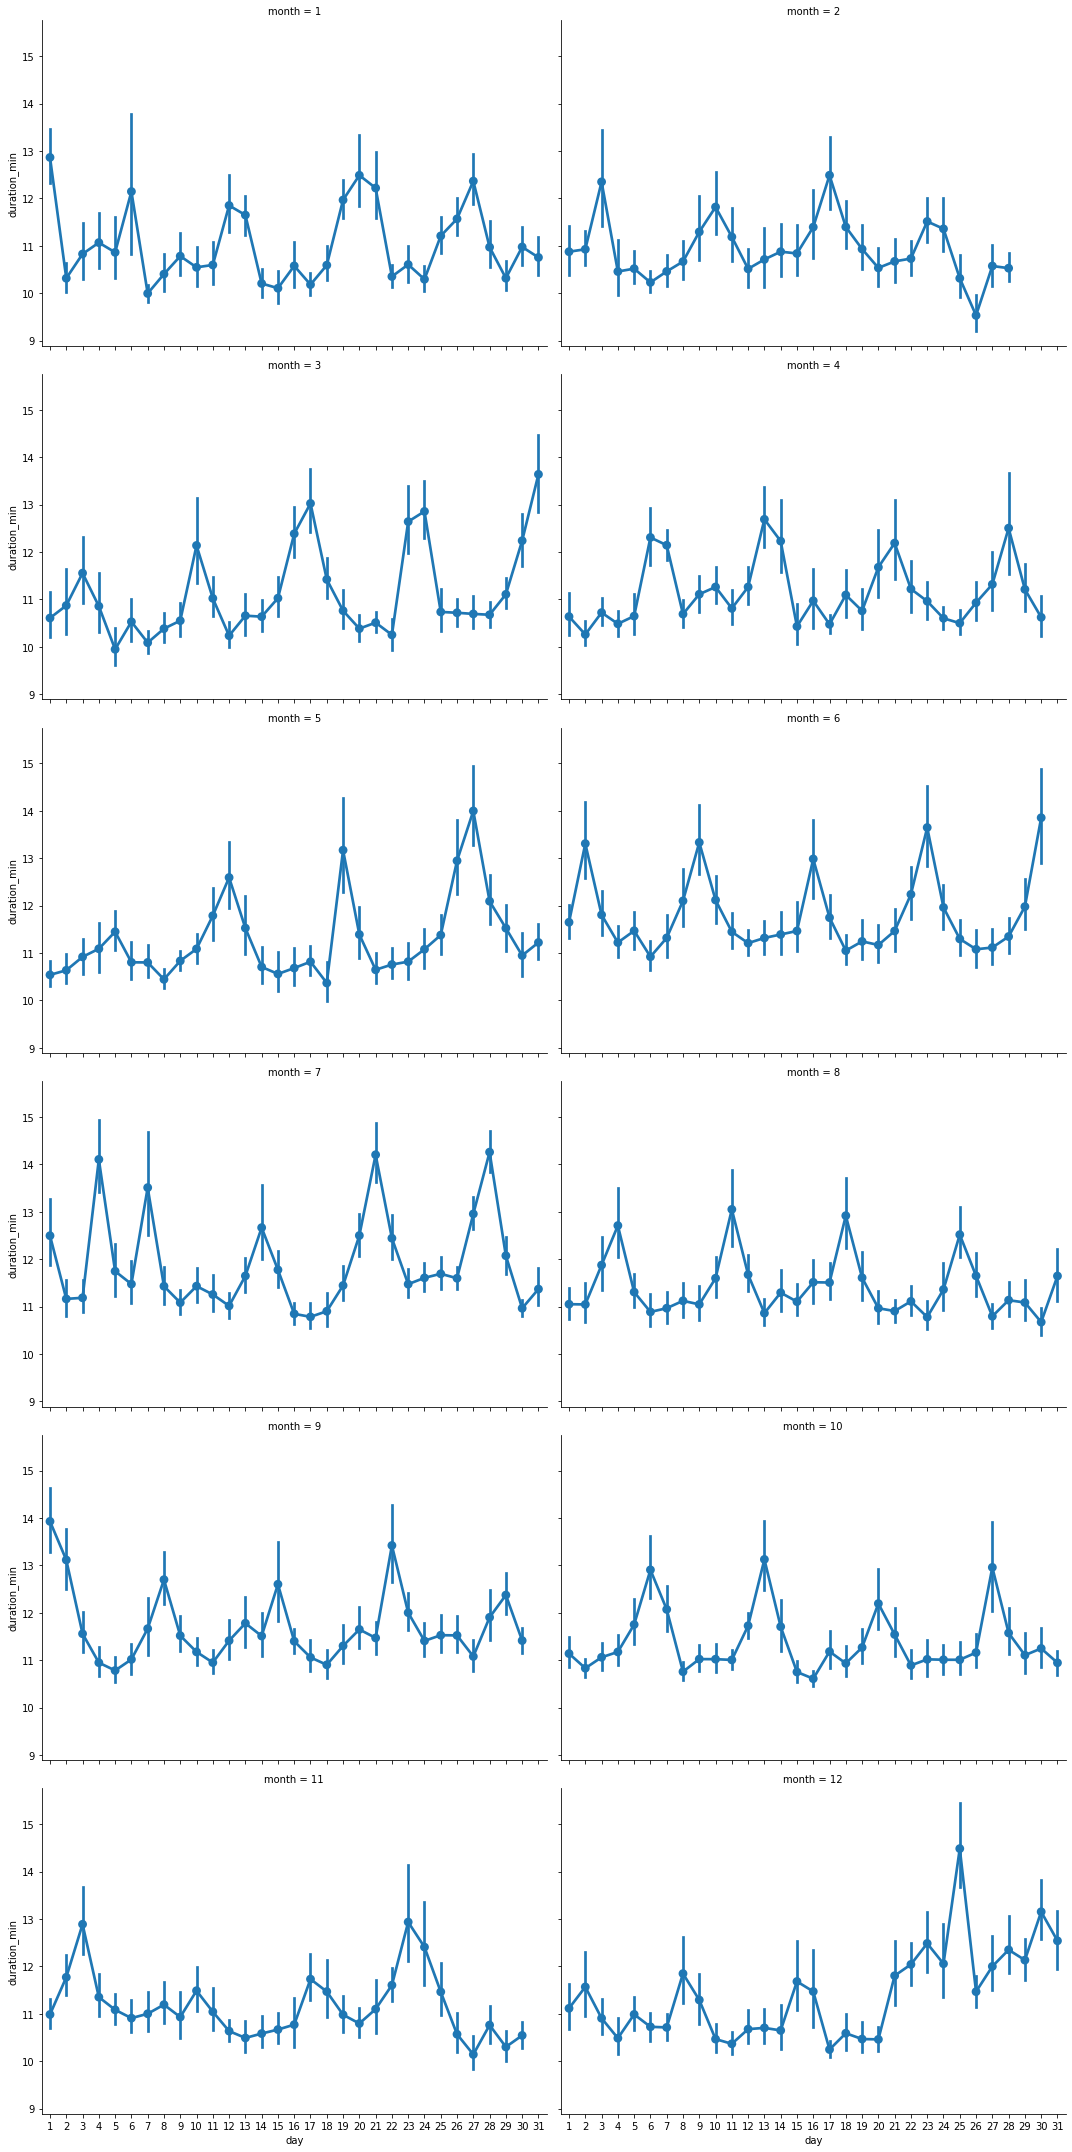

In [50]:
line_graph(df_subscriber)

> With customers excluded in this one and only subscribers analyzed, we see the values in general are much lower including the high peaks.  The max is around 12 - 13 minutes.  Interestinlgy, there is no large beginning spike and decline for the first month as shown in the whole and customer's first month.  Month 11 is also radically different when it is just subscribers.

In [51]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    y_bins = 10 ** np.arange(1.7, 4.3+0.1, 0.1)
    y_ticks = [100, 300, 1000, 3000, 10000]
    y_labels = [100, 300, '1k', '3k', '10k']
    
    plt.hist2d(x, y, bins = [10, y_bins], cmap = palette, cmin = 100)
    plt.yscale('log')
    plt.yticks(y_ticks, y_labels)

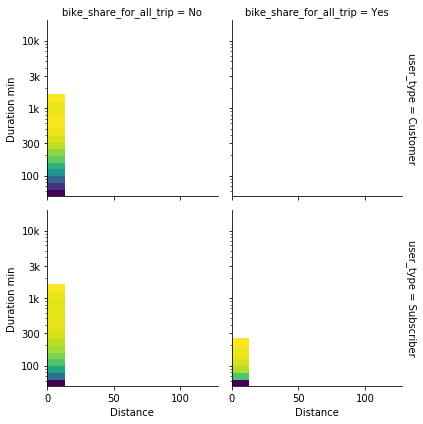

In [52]:
# plot the heatmap
g = sb.FacetGrid(data=df_clean, col='bike_share_for_all_trip', row='user_type', margin_titles=True)
g.map(hist2dgrid, 'distance', 'duration_min', color='viridis_r')
g.set_xlabels('Distance')
g.set_ylabels('Duration min');

> This graph like matrix makes sense.  As already established, most do not use the bike share for all of the trip.  But we find that the distance between those who use the whole way and not, are nearly the same in distance length.
And it would make sense that those who subscribe and given a choice to use for the entire trip would not opt out.  Those who subscribe use this as a need rather than a desire to get to a place. Customers use this as a fun trip, and will use other means necessary if given.

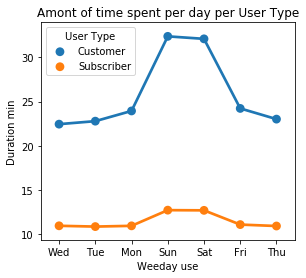

In [53]:
plt.figure(figsize=[10, 4])

# plot the point plot of month vs user type
plt.subplot(1, 2, 1)
sb.pointplot(data=df_clean, x='start_time_weekday', y='duration_min', hue='user_type', errwidth=0)
plt.xlabel('Weeday use')
plt.ylabel('Duration min')
plt.title('Amont of time spent per day per User Type')
plt.legend(title='User Type')

> Customers again, would use this on their non working day as leisure especially at a longer time frame.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes there were features that showed Customers to Subscribers differences.

### Were there any interesting or surprising interactions between features?

> Yes, in terms of the line timeline graph, seeing the small differences between customers and subscribers was interesting, epecially to see how they both then average together in a graph.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu.

resources: https://github.com/yinghaoz1/ford-gobike-dateset-exploration/blob/master/ford-gobike-dateset-exploration-part1.ipynb
https://github.com/Sarita19/Ford-GoBike-System-Data/blob/master/udacity_project.ipynb